# Differentiation in Python: Symbolic, Numerical and Automatic

In this lab you explore which tools and libraries are available in Python to compute derivatives. You will perform symbolic differentiation with `SymPy` library, numerical with `NumPy` and automatic with `JAX` (based on `Autograd`). Comparing the speed of calculations, you will investigate the computational efficiency of those three methods.

# Table of Contents
- [ 1 - Functions in Python](#1)
- [ 2 - Symbolic Differentiation](#2)
  - [ 2.1 - Introduction to Symbolic Computation with `SymPy`](#2.1)
  - [ 2.2 - Symbolic Differentiation with `SymPy`](#2.2)
  - [ 2.3 - Limitations of Symbolic Differentiation](#2.3)
- [ 3 - Numerical Differentiation](#3)
  - [ 3.1 - Numerical Differentiation with `NumPy`](#3.1)
  - [ 3.2 - Limitations of Numerical Differentiation](#3.2)
- [ 4 - Automatic Differentiation](#4)
  - [ 4.1 - Introduction to `JAX`](#4.1)
  - [ 4.2 - Automatic Differentiation with `JAX` ](#4.2)
- [ 5 - Computational Efficiency of Symbolic, Numerical and Automatic Differentiation](#5)
- [6 - Optimization Using Gradient Descent in One Variable](#6)
  * [6.1 - Function with One Global Minimum](#6.1)
  * [6.2 - Function with Multiple Minima](#6.2)
- [7 - Optimization Using Gradient Descent in Two Variables](#7)
  * [7.1 - Function with One Global Minimum](#7.1)
  * [7.2 - Function with Multiple Minima](#7.2)



<a name='1'></a>
## 1 - Functions in Python

This is just a reminder how to define functions in Python. A simple function $f\left(x\right) = x^2$, it can be set up as:

In [1]:
def f(x):
    return x**2

print(f(3))

9


You can easily find the derivative of this function analytically. You can set it up as a separate function:

In [3]:
def dfdx(x):
    return 2*x

print(dfdx(3))

6


Since you have been working with the `NumPy` arrays, you can apply the function to each element of an array:

In [4]:
import numpy as np

x_array = np.array([1, 2, 3])

print("x: \n", x_array)
print("f(x) = x**2: \n", f(x_array))
print("f'(x) = 2x: \n", dfdx(x_array))

x: 
 [1 2 3]
f(x) = x**2: 
 [1 4 9]
f'(x) = 2x: 
 [2 4 6]


Now you can apply those functions `f` and `dfdx` to an array of a larger size. The following code will plot function and its derivative (you don't have to understand the details of the `plot_f1_and_f2` function at this stage):

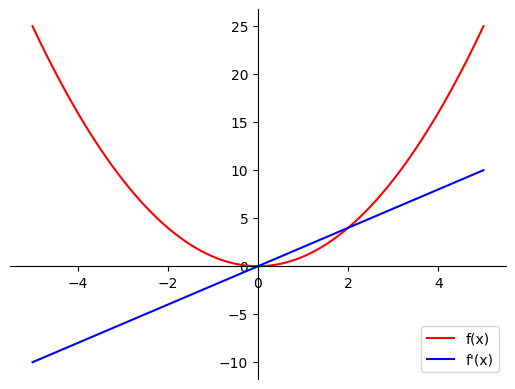

In [5]:
import matplotlib.pyplot as plt

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline

def plot_f1_and_f2(f1, f2=None, x_min=-5, x_max=5, label1="f(x)", label2="f'(x)"):
    x = np.linspace(x_min, x_max,100)

    # Setting the axes at the centre.
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.plot(x, f1(x), 'r', label=label1)
    if not f2 is None:
        # If f2 is an array, it is passed as it is to be plotted as unlinked points.
        # If f2 is a function, f2(x) needs to be passed to plot it.
        if isinstance(f2, np.ndarray):
            plt.plot(x, f2, 'bo', markersize=3, label=label2,)
        else:
            plt.plot(x, f2(x), 'b', label=label2)
    plt.legend()

    plt.show()

plot_f1_and_f2(f, dfdx)

In real life the functions are more complicated and it is not possible to calculate the derivatives analytically every time. Let's explore which tools and libraries are available in Python for the computation of derivatives without manual derivation.

<a name='2'></a>
## 2 - Symbolic Differentiation

**Symbolic computation** deals with the computation of mathematical objects that are represented exactly, not approximately (e.g. $\sqrt{2}$ will be written as it is, not as $1.41421356237$). For differentiation it would mean that the output will be somehow similar to if you were computing derivatives by hand using rules (analytically). Thus, symbolic differentiation can produce exact derivatives.

<a name='2.1'></a>
### 2.1 - Introduction to Symbolic Computation with `SymPy`

Let's explore symbolic differentiation in Python with commonly used `SymPy` library.

If you want to compute the approximate decimal value of $\sqrt{18}$, you could normally do it in the following way:

In [6]:
import math

math.sqrt(18)

4.242640687119285

The output $4.242640687119285$ is an approximate result. You may recall that $\sqrt{18} = \sqrt{9 \cdot 2} = 3\sqrt{2}$ and see that it is pretty much impossible to deduct it from the approximate result. But with the symbolic computation systems the roots are not approximated with a decimal number but rather only simplified, so the output is exact:

In [7]:
# This format of module import allows to use the sympy functions without sympy. prefix.
from sympy import *

# This is actually sympy.sqrt function, but sympy. prefix is omitted.
sqrt(18)

3*sqrt(2)

Numerical evaluation of the result is available, and you can set number of the digits to show in the approximated output:

In [8]:
N(sqrt(18),8)

4.2426407

In `SymPy` variables are defined using **symbols**. In this particular library they need to be predefined (a list of them should be provided). Have a look in the cell below, how the symbolic expression, correspoinding to the mathematical expression $2x^2 - xy$, is defined:

In [9]:
# List of symbols.
x, y = symbols('x y')
# Definition of the expression.
expr = 2 * x**2 - x * y
expr

2*x**2 - x*y

Now you can perform various manipulations with this expression: add or subtract some terms, multiply by other expressions etc., just like if you were doing it by hands:

In [10]:
expr_manip = x * (expr + x * y + x**3)
expr_manip

x*(x**3 + 2*x**2)

You can also expand the expression:

In [11]:
expand(expr_manip)

x**4 + 2*x**3

Or factorise it:

In [12]:
factor(expr_manip)

x**3*(x + 2)

To substitute particular values for the variables in the expression, you can use the following code:

In [13]:
expr.evalf(subs={x:-1, y:2})

4.00000000000000

This can be used to evaluate a function $f\left(x\right) = x^2$:

In [14]:
f_symb = x ** 2
f_symb.evalf(subs={x:3})

9.00000000000000

You might be wondering now, is it possible to evaluate the symbolic functions for each element of the array? At the beginning of the lab you have defined a `NumPy` array `x_array`:

In [15]:
print(x_array)

[1 2 3]


Now try to evaluate function `f_symb` for each element of the array. You will get an error:

In [16]:
try:
    f_symb(x_array)
except TypeError as err:
    print(err)

'Pow' object is not callable


It is possible to evaluate the symbolic functions for each element of the array, but you need to make a function `NumPy`-friendly first:

In [17]:
from sympy.utilities.lambdify import lambdify

f_symb_numpy = lambdify(x, f_symb, 'numpy')

The following code should work now:

In [18]:
print("x: \n", x_array)
print("f(x) = x**2: \n", f_symb_numpy(x_array))

x: 
 [1 2 3]
f(x) = x**2: 
 [1 4 9]


`SymPy` has lots of great functions to manipulate expressions and perform various operations from calculus. More information about them can be found in the official documentation [here](https://docs.sympy.org/).

<a name='2.2'></a>
### 2.2 - Symbolic Differentiation with `SymPy`

Let's try to find a derivative of a simple power function using `SymPy`:

In [19]:
diff(x**3,x)

3*x**2

Some standard functions can be used in the expression, and `SymPy` will apply required rules (sum, product, chain) to calculate the derivative:

In [20]:
dfdx_composed = diff(exp(-2*x) + 3*sin(3*x), x)
dfdx_composed

9*cos(3*x) - 2*exp(-2*x)

Now calculate the derivative of the function `f_symb` defined in [2.1](#2.1) and make it `NumPy`-friendly:

In [21]:
dfdx_symb = diff(f_symb, x)
dfdx_symb_numpy = lambdify(x, dfdx_symb, 'numpy')

Evaluate function `dfdx_symb_numpy` for each element of the `x_array`:

In [22]:
print("x: \n", x_array)
print("f'(x) = 2x: \n", dfdx_symb_numpy(x_array))

x: 
 [1 2 3]
f'(x) = 2x: 
 [2 4 6]


You can apply symbolically defined functions to the arrays of larger size. The following code will plot function and its derivative, you can see that it works:

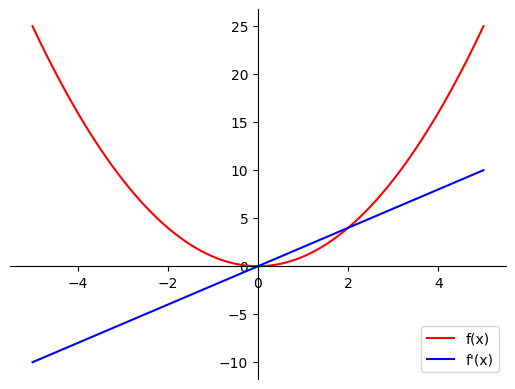

In [23]:
plot_f1_and_f2(f_symb_numpy, dfdx_symb_numpy)

<a name='2.3'></a>
### 2.3 - Limitations of Symbolic Differentiation

Symbolic Differentiation seems to be a great tool. But it also has some limitations. Sometimes the output expressions are too complicated and even not possible to evaluate. For example, find the derivative of the function $$\left|x\right| = \begin{cases} x, \ \text{if}\ x > 0\\  -x, \ \text{if}\ x < 0 \\ 0, \ \text{if}\ x = 0\end{cases}$$ Analytically, its derivative is:
$$\frac{d}{dx}\left(\left|x\right|\right) = \begin{cases} 1, \ \text{if}\ x > 0\\  -1, \ \text{if}\ x < 0\\\ \text{does not exist}, \ \text{if}\ x = 0\end{cases}$$

Have a look the output from the symbolic differentiation:

In [24]:
dfdx_abs = diff(abs(x), x)
dfdx_abs

(re(x)*Derivative(re(x), x) + im(x)*Derivative(im(x), x))*sign(x)/x

Looks complicated, but it would not be a problem if it was possible to evaluate. But check, that for $x=-2$ instead of the derivative value $-1$ it outputs some unevaluated expression:

In [25]:
dfdx_abs.evalf(subs={x:-2})

-Subs(Derivative(re(x), x), x, -2)

In fact, there are problems with the evaluation of the symbolic expressions wherever there is a "jump" in the derivative (e.g. function expressions are different for different intervals of $x$), like it happens with $\frac{d}{dx}\left(\left|x\right|\right)$.

Also, you can see in this example, that you can get a very complicated function as an output of symbolic computation. This is called **expression swell**, which results in unefficiently slow computations. You will see the example of that below after learning other differentiation libraries in Python.

<a name='3'></a>
## 3 - Numerical Differentiation

This method does not take into account the function expression. The only important thing is that the function can be evaluated in the nearby points $x$ and $x+\Delta x$, where $\Delta x$ is sufficiently small. Then $\frac{df}{dx}\approx\frac{f\left(x + \Delta x\right) - f\left(x\right)}{\Delta x}$, which can be called a **numerical approximation** of the derivative.

Based on that idea there are different approaches for the numerical approximations, which somehow vary in the computation speed and accuracy. However, for all of the methods the results are not accurate - there is a round off error. At this stage there is no need to go into details of various methods, it is enough to investigate one of the numerial differentiation functions, available in `NumPy` package.

<a name='3.1'></a>
### 3.1 - Numerical Differentiation with `NumPy`

You can call function `np.gradient` to find the derivative of function $f\left(x\right) = x^2$ defined above. The first argument is an array of function values, the second defines the spacing $\Delta x$ for the evaluation. Here pass it as an array of $x$ values, the differences will be calculated automatically. You can find the documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html).

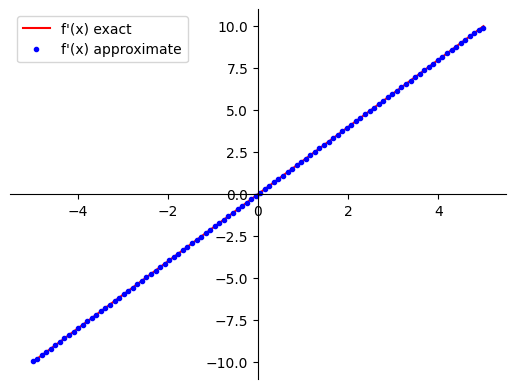

In [26]:
x_array_2 = np.linspace(-5, 5, 100)
dfdx_numerical = np.gradient(f(x_array_2), x_array_2)

plot_f1_and_f2(dfdx_symb_numpy, dfdx_numerical, label1="f'(x) exact", label2="f'(x) approximate")

Try to do numerical differentiation for more complicated function:

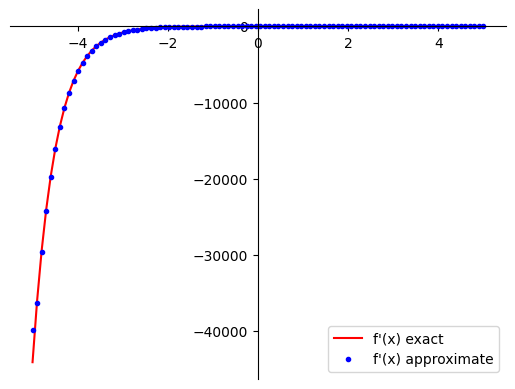

In [27]:
def f_composed(x):
    return np.exp(-2*x) + 3*np.sin(3*x)

plot_f1_and_f2(lambdify(x, dfdx_composed, 'numpy'), np.gradient(f_composed(x_array_2), x_array_2),
              label1="f'(x) exact", label2="f'(x) approximate")

The results are pretty impressive, keeping in mind that it does not matter at all how the function was calculated - only the final values of it!

<a name='3.2'></a>
### 3.2 - Limitations of Numerical Differentiation

Obviously, the first downside of the numerical differentiation is that it is not exact. However, the accuracy of it is normally enough for machine learning applications. At this stage there is no need to evaluate errors of the numerical differentiation.

Another problem is similar to the one which appeared in the symbolic differentiation: it is inaccurate at the points where there are "jumps" of the derivative. Let's compare the exact derivative of the absolute value function and with numerical approximation:

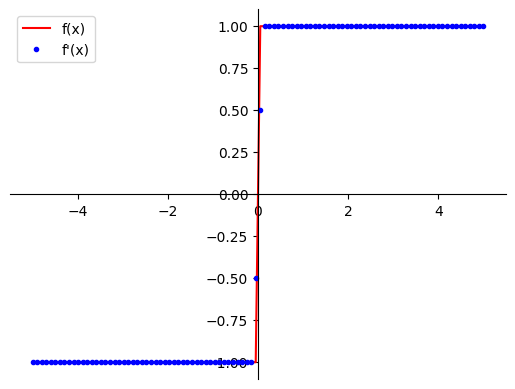

In [28]:
def dfdx_abs(x):
    if x > 0:
        return 1
    else:
        if x < 0:
            return -1
        else:
            return None

plot_f1_and_f2(np.vectorize(dfdx_abs), np.gradient(abs(x_array_2), x_array_2))

You can see that the results near the "jump" are $0.5$ and $-0.5$, while they should be $1$ and $-1$. These cases can give significant errors in the computations.

But the biggest problem with the numerical differentiation is slow speed. It requires function evalutation every time.  In machine learning models there are hundreds of parameters and there are hundreds of derivatives to be calculated, performing full function evaluation every time slows down the computation process. You will see the example of it below.

<a name='4'></a>
## 4 - Automatic Differentiation

**Automatic differentiation** (autodiff) method breaks down the function into common functions ($sin$, $cos$, $log$, power functions, etc.), and constructs the computational graph consisting of the basic functions. Then the chain rule is used to compute the derivative at any node of the graph. It is the most commonly used approach in machine learning applications and neural networks, as the computational graph for the function and its derivatives can be built during the construction of the neural network, saving in future computations.

The main disadvantage of it is implementational difficulty. However, nowadays there are libraries that are convenient to use, such as [MyGrad](https://mygrad.readthedocs.io/en/latest/index.html), [Autograd](https://autograd.readthedocs.io/en/latest/) and [JAX](https://jax.readthedocs.io/en/latest/). `Autograd` and `JAX` are the most commonly used in the frameworks to build neural networks. `JAX` brings together `Autograd` functionality for optimization problems, and `XLA` (Accelerated Linear Algebra) compiler for parallel computing.

The syntax of `Autograd` and `JAX` are slightly different. It would be overwhelming to cover both at this stage. In this notebook you will be performing automatic differentiation using one of them: `JAX`.

<a name='4.1'></a>
### 4.1 - Introduction to `JAX`

To begin with, load the required libraries. From `jax` package you need to load just a couple of functions for now (`grad` and `vmap`). Package `jax.numpy` is a wrapped `NumPy`, which pretty much replaces `NumPy` when `JAX` is used. It can be loaded as `np` as if it was an original `NumPy` in most of the cases. However, in this notebook you'll upload it as `jnp` to distinguish them for now.

In [29]:
from jax import grad, vmap
import jax.numpy as jnp

Create a new `jnp` array and check its type.

In [30]:
x_array_jnp = jnp.array([1., 2., 3.])

print("Type of NumPy array:", type(x_array))
print("Type of JAX NumPy array:", type(x_array_jnp))
# Please ignore the warning message if it appears.

Type of NumPy array: <class 'numpy.ndarray'>
Type of JAX NumPy array: <class 'jaxlib.xla_extension.ArrayImpl'>


The same array can be created just converting previously defined `x_array = np.array([1, 2, 3])`, although in some cases `JAX` does not operate with integers, thus the values need to be converted to floats. You will see an example of it below.

In [31]:
x_array_jnp = jnp.array(x_array.astype('float32'))
print("JAX NumPy array:", x_array_jnp)
print("Type of JAX NumPy array:", type(x_array_jnp))

JAX NumPy array: [1. 2. 3.]
Type of JAX NumPy array: <class 'jaxlib.xla_extension.ArrayImpl'>


Note, that `jnp` array has a specific type `jaxlib.xla_extension.ArrayImpl`. In most of the cases the same operators and functions are applicable to them as in the original `NumPy`, for example:

In [32]:
print(x_array_jnp * 2)
print(x_array_jnp[2])

[2. 4. 6.]
3.0


But sometimes working with `jnp` arrays the approach needs to be changed. In the following code, trying to assign a new value to one of the elements, you will get an error:

In [33]:
try:
    x_array_jnp[2] = 4.0
except TypeError as err:
    print(err)

'<class 'jaxlib.xla_extension.ArrayImpl'>' object does not support item assignment. JAX arrays are immutable. Instead of ``x[idx] = y``, use ``x = x.at[idx].set(y)`` or another .at[] method: https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html


To assign a new value to an element in the `jnp` array you need to apply functions `.at[i]`, stating which element to update, and `.set(value)` to set a new value. These functions also operate **out-of-place**, the updated array is returned as a new array and the original array is not modified by the update.

In [34]:
y_array_jnp = x_array_jnp.at[2].set(4.0)
print(y_array_jnp)

[1. 2. 4.]


Although, some of the `JAX` functions will work with arrays defined with `np` and `jnp`. In the following code you will get the same result in both lines:

In [35]:
print(jnp.log(x_array))
print(jnp.log(x_array_jnp))

[0.        0.6931472 1.0986123]
[0.        0.6931472 1.0986123]


This is probably confusing - which `NumPy` to use then? Usually when `JAX` is used, only `jax.numpy` gets imported as `np`, and used instead of the original one.

 <a name='4.2'></a>
### 4.2 - Automatic Differentiation with `JAX`

Time to do automatic differentiation with `JAX`. The following code will calculate the derivative of the previously defined function $f\left(x\right) = x^2$ at the point $x = 3$:

In [36]:
def f(x):
    return x**2
print("Function value at x = 3:", f(3.0))
print("Derivative value at x = 3:",grad(f)(3.0))

Function value at x = 3: 9.0
Derivative value at x = 3: 6.0


Very easy, right? Keep in mind, please, that this cannot be done using integers. The following code will output an error:

In [39]:
try:
    print(grad(f)(3.0))
except TypeError as err:
    print(err)

6.0


Try to apply the `grad` function to an array, calculating the derivative for each of its elements:

In [40]:
try:
    grad(f)(x_array_jnp)
except TypeError as err:
    print(err)

Gradient only defined for scalar-output functions. Output had shape: (3,).


There is some broadcasting issue there. You don't need to get into more details of this at this stage, function `vmap` can be used here to solve the problem.

*Note*: Broadcasting is covered in the Course 1 of this Specialization "Linear Algebra". You can also review it in the documentation [here](https://numpy.org/doc/stable/user/basics.broadcasting.html#:~:text=The%20term%20broadcasting%20describes%20how,that%20they%20have%20compatible%20shapes.).

In [41]:
dfdx_jax_vmap = vmap(grad(f))(x_array_jnp)
print(dfdx_jax_vmap)

[2. 4. 6.]


Great, now `vmap(grad(f))` can be used to calculate the derivative of function `f` for arrays of larger size and you can plot the output:

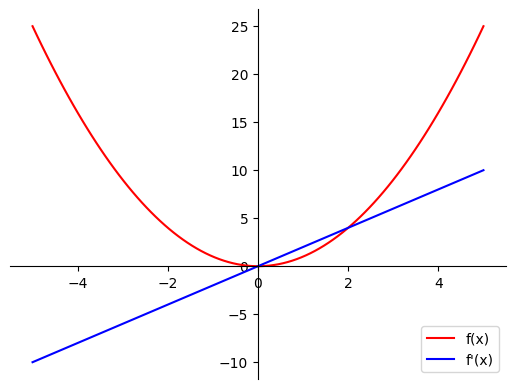

In [42]:
plot_f1_and_f2(f, vmap(grad(f)))

In the following code you can comment/uncomment lines to visualize the common derivatives. All of them are found using `JAX` automatic differentiation. The results look pretty good!

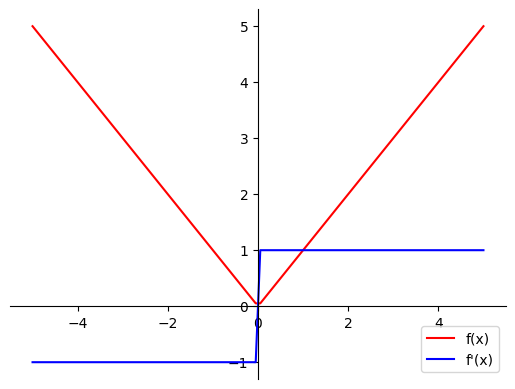

In [43]:
def g(x):
#     return x**3
#     return 2*x**3 - 3*x**2 + 5
#     return 1/x
#     return jnp.exp(x)
#     return jnp.log(x)
#     return jnp.sin(x)
#     return jnp.cos(x)
    return jnp.abs(x)
#     return jnp.abs(x)+jnp.sin(x)*jnp.cos(x)

plot_f1_and_f2(g, vmap(grad(g)))

<a name='5'></a>
## 5 - Computational Efficiency of Symbolic, Numerical and Automatic Differentiation

In sections [2.3](#2.3) and [3.2](#3.2) low computational efficiency of symbolic and numerical differentiation was discussed. Now it is time to compare speed of calculations for each of three approaches. Try to find the derivative of the same simple function $f\left(x\right) = x^2$ multiple times, evaluating it for an array of a larger size, compare the results and time used:

In [45]:
import timeit, time

x_array_large = np.linspace(-5, 5, 1000000)

tic_symb = time.time()
res_symb = lambdify(x, diff(f(x),x),'numpy')(x_array_large)
toc_symb = time.time()
time_symb = 1000 * (toc_symb - tic_symb)  # Time in ms.

tic_numerical = time.time()
res_numerical = np.gradient(f(x_array_large),x_array_large)
toc_numerical = time.time()
time_numerical = 1000 * (toc_numerical - tic_numerical)

tic_jax = time.time()
res_jax = vmap(grad(f))(jnp.array(x_array_large.astype('float32')))
toc_jax = time.time()
time_jax = 1000 * (toc_jax - tic_jax)

print(f"Results\nSymbolic Differentiation:\n{res_symb}\n" +
      f"Numerical Differentiation:\n{res_numerical}\n" +
      f"Automatic Differentiation:\n{res_jax}")

print(f"\n\nTime\nSymbolic Differentiation:\n{time_symb} ms\n" +
      f"Numerical Differentiation:\n{time_numerical} ms\n" +
      f"Automatic Differentiation:\n{time_jax} ms")

Results
Symbolic Differentiation:
[-10.       -9.99998  -9.99996 ...   9.99996   9.99998  10.     ]
Numerical Differentiation:
[-9.99999 -9.99998 -9.99996 ...  9.99996  9.99998  9.99999]
Automatic Differentiation:
[-10.       -9.99998  -9.99996 ...   9.99996   9.99998  10.     ]


Time
Symbolic Differentiation:
5.483150482177734 ms
Numerical Differentiation:
104.05755043029785 ms
Automatic Differentiation:
15.714645385742188 ms


The results are pretty much the same, but the time used is different. Numerical approach is obviously inefficient when differentiation needs to be performed many times, which happens a lot training machine learning models. Symbolic and automatic approach seem to be performing similarly for this simple example. But if the function becomes a little bit more complicated, symbolic computation will experiance significant expression swell and the calculations will slow down.

*Note*: Sometimes the execution time results may vary slightly, especially for automatic differentiation. You can run the code above a few time to see different outputs. That does not influence the conclusion that numerical differentiation is slower. `timeit` module can be used more efficiently to evaluate execution time of the codes, but that would unnecessary overcomplicate the codes here.

Try to define some polynomial function, which should not be that hard to differentiate, and compare the computation time for its differentiation symbolically and automatically:

In [47]:
def f_polynomial_simple(x):
    return 2*x**3 - 3*x**2 + 5

def f_polynomial(x):
    for i in range(3):
        x = f_polynomial_simple(x)
    return x

tic_polynomial_symb = time.time()
res_polynomial_symb = lambdify(x, diff(f_polynomial(x),x),'numpy')(x_array_large)
toc_polynomial_symb = time.time()
time_polynomial_symb = 1000 * (toc_polynomial_symb - tic_polynomial_symb)

tic_polynomial_jax = time.time()
res_polynomial_jax = vmap(grad(f_polynomial))(jnp.array(x_array_large.astype('float32')))
toc_polynomial_jax = time.time()
time_polynomial_jax = 1000 * (toc_polynomial_jax - tic_polynomial_jax)

print(f"Results\nSymbolic Differentiation:\n{res_polynomial_symb}\n" +
      f"Automatic Differentiation:\n{res_polynomial_jax}")

print(f"\n\nTime\nSymbolic Differentiation:\n{time_polynomial_symb} ms\n" +
      f"Automatic Differentiation:\n{time_polynomial_jax} ms")

Results
Symbolic Differentiation:
[2.88570423e+24 2.88556400e+24 2.88542377e+24 ... 1.86202587e+22
 1.86213384e+22 1.86224181e+22]
Automatic Differentiation:
[2.8857043e+24 2.8855642e+24 2.8854241e+24 ... 1.8620253e+22 1.8621349e+22
 1.8622416e+22]


Time
Symbolic Differentiation:
780.8694839477539 ms
Automatic Differentiation:
117.18010902404785 ms


Again, the results are similar, but automatic differentiation is times faster.

With the increase of function computation graph, the efficiency of automatic differentiation compared to other methods raises, because autodiff method uses chain rule!

Congratulations! Now you are equiped with Python tools to perform differentiation.

<a name='6'></a>
## 6 - Optimization Using Gradient Descent in One Variable

To understand how to optimize functions using gradient descent, start from simple examples - functions of one variable. In this lab, you will implement the gradient descent method for functions with single and multiple minima, experiment with the parameters and visualize the results. This will allow you to understand the advantages and disadvantages of the gradient descent method.

### Packages

Run the following cell to load the packages you'll need.

In [48]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib.patches import FancyArrowPatch
from matplotlib.gridspec import GridSpec
from IPython.display import display, clear_output


def plot_f(x_range, y_range, f, ox_position):
    x = np.linspace(*x_range, 100)
    fig, ax = plt.subplots(1,1,figsize=(8,4))

    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

    ax.set_ylim(*y_range)
    ax.set_xlim(*x_range)
    ax.set_ylabel('$f$')
    ax.set_xlabel('$x$')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position(('data', ox_position))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.autoscale(enable=False)

    pf = ax.plot(x, f(x), 'k')

    return fig, ax


class gradient_descent_one_variable:
    """ class to run one interactive plot """
    def __init__(self, x_range, y_range, f, dfdx, gd, n_it, lr, x_0, ox_position, t_position):
        x = np.linspace(*x_range, 100)
        fig, ax = plot_f(x_range, y_range, f, ox_position)

        # Initialize plot.
        self.fig = fig
        self.ax = ax
        self.x = x
        self.f = f
        self.dfdx = dfdx
        self.gd = gd
        self.n_it = n_it
        self.lr = lr
        self.x_0 = x_0
        self.x_range = x_range
        self.i = 0
        self.ox_position = ox_position
        self.t_position = t_position

        self.update_plot_point(firsttime=True)
        self.path = path(self.x_0, self.ax, self.ox_position)  # initialize an empty path, avoids existance check

        time.sleep(0.2)
        clear_output(wait=True)
        display(self.fig)

        self.run_gd()
        self.cpoint = self.fig.canvas.mpl_connect('button_press_event', self.click_plot)

    def click_plot(self, event):
        ''' Called when click in plot '''
        if (event.xdata <= max(self.x) and event.xdata >= min(self.x)):
            self.x_0 = event.xdata
            self.i = 0
            self.path.re_init(self.x_0)
            self.update_plot_point()
            time.sleep(0.2)
            self.run_gd()

    def update_plot_point(self, firsttime=False):

        # Remove items and re-add them on plot.
        if not firsttime:
            for artist in self.p_items:
                artist.remove()

        a = self.ax.scatter(self.x_0, self.f(self.x_0), marker='o', s=100, color='r', zorder=10)
        b = self.ax.scatter(self.x_0, self.ox_position, marker='o', s=100, color='k', zorder=10)
        c = self.ax.hlines(self.f(self.x_0), 0, self.x_0, lw=2, ls='dotted', color='k')
        d = self.ax.vlines(self.x_0, self.ox_position, self.f(self.x_0), lw=2, ls='dotted', color='k')
        t_it = self.ax.annotate(f"Iteration #${self.i}$", xy=(self.t_position[0], self.t_position[1]),
                                xytext=(4,4), textcoords='offset points', size=10)
        t_x_0 = self.ax.annotate(f"$x_0 = {self.x_0:0.4f}$", xy=(self.t_position[0], self.t_position[1]-1),
                                 xytext=(4,4), textcoords='offset points', size=10)
        t_f = self.ax.annotate(f"$f\\,\\left(x_0\\right) = {self.f(self.x_0):0.2f}$",
                               xy=(self.t_position[0], self.t_position[1]-2), xytext=(4,4),
                              textcoords='offset points', size=10)
        t_dfdx = self.ax.annotate(f"$f\\,'\\left(x_0\\right) = {self.dfdx(self.x_0):0.4f}$",
                                  xy=(self.t_position[0], self.t_position[1]-3),
                                  xytext=(4,4), textcoords='offset points', size=10)

        self.p_items = [a, b, c, d, t_it, t_x_0, t_f, t_dfdx]
        self.fig.canvas.draw()

    def run_gd(self):
        self.i = 1
        x_0_new = self.gd(self.dfdx, self.x_0, self.lr, 1)
        while (self.i <= self.n_it and abs(self.dfdx(x_0_new)) >= 0.00001 and x_0_new >= self.x_range[0]):
            x_0_new = self.gd(self.dfdx, self.x_0, self.lr, 1)
            self.path.add_path_item(x_0_new, self.f)
            self.x_0 = x_0_new
            time.sleep(0.05)
            self.update_plot_point()
            clear_output(wait=True)
            display(self.fig)
            self.i += 1

        if abs(self.dfdx(self.x_0)) >= 0.00001 or self.x_0 < self.x_range[0] or self.x_0 < self.x_range[0]:
            t_res = self.ax.annotate("Has Not Converged", xy=(self.t_position[0], self.t_position[1]-4),
                             xytext=(4,4), textcoords='offset points', size=10)
        else:
            t_res = self.ax.annotate("Converged", xy=(self.t_position[0], self.t_position[1]-4),
                             xytext=(4,4), textcoords='offset points', size=10)
        t_instruction = self.ax.text(0.3,0.95,"[Click on the plot to choose initial point]",
                                     size=10, color="r", transform=self.ax.transAxes)
        self.p_items.append(t_res)
        self.p_items.append(t_instruction)
        # Clear last time at the end, so there is no duplicate with the cell output.
        clear_output(wait=True)
#         plt.close()


class path:
    ''' tracks paths during gradient descent on the plot '''
    def __init__(self, x_0, ax, ox_position):
        ''' x_0 at start of path '''
        self.path_items = []
        self.x_0 = x_0
        self.ax = ax
        self.ox_position = ox_position

    def re_init(self, x_0):
        for artist in self.path_items:
            artist.remove()
        self.path_items = []
        self.x_0 = x_0

    def add_path_item(self, x_0, f):
        a = FancyArrowPatch(
            posA=(self.x_0, self.ox_position), posB=(x_0, self.ox_position), color='r',
            arrowstyle='simple, head_width=5, head_length=10, tail_width=1.0',
        )
        b = self.ax.scatter(self.x_0, f(self.x_0), facecolors='none', edgecolors='r', ls='dotted', s=100, zorder=10)
        self.ax.add_artist(a)
        self.path_items.append(a)
        self.path_items.append(b)
        self.x_0 = x_0


# +
def f_example_2(x):
    return (np.exp(x) - np.log(x))*np.sin(np.pi*x*2)

def dfdx_example_2(x):
    return (np.exp(x) - 1/x)*np.sin(np.pi*x*2) + (np.exp(x) - \
              np.log(x))*np.cos(np.pi*x*2)*2*np.pi


# +
def f_example_3(x,y):
    return (85+ 0.1*(- 1/9*(x-6)*x**2*y**3 + 2/3*(x-6)*x**2*y**2))

def dfdx_example_3(x,y):
    return 0.1/3*x*y**2*(2-y/3)*(3*x-12)

def dfdy_example_3(x,y):
    return 0.1/3*(x-6)*x**2*y*(4-y)


# +
def f_example_4(x,y):
    return -(10/(3+3*(x-.5)**2+3*(y-.5)**2) + \
            2/(1+2*((x-3)**2)+2*(y-1.5)**2) + \
            3/(1+.5*((x-3.5)**2)+0.5*(y-4)**2))+10

def dfdx_example_4(x,y):
    return  -(-2*3*(x-0.5)*10/(3+3*(x-0.5)**2+3*(y-0.5)**2)**2 + \
            -2*2*(x-3)*2/(1+2*((x-3)**2)+2*(y-1.5)**2)**2 +\
            -2*0.5*(x-3.5)*3/(1+.5*((x-3.5)**2)+0.5*(y-4)**2)**2)

def dfdy_example_4(x,y):
    return -(-2*3*(y-0.5)*10/(3+3*(x-0.5)**2+3*(y-0.5)**2)**2 + \
            -2*2*(y-1.5)*2/(1+2*((x-3)**2)+2*(y-1.5)**2)**2 +\
            -0.5*2*(y-4)*3/(1+.5*((x-3.5)**2)+0.5*(y-4)**2)**2)


# -

def plot_f_cont_and_surf(x_range, y_range, z_range, f, cmap, view):

    fig = plt.figure( figsize=(10,5))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    fig.set_facecolor('#ffffff') #white
    gs = GridSpec(1, 2, figure=fig)
    axc = fig.add_subplot(gs[0, 0])
    axs = fig.add_subplot(gs[0, 1],  projection='3d')

    x = np.linspace(*x_range, 51)
    y = np.linspace(*y_range, 51)
    X,Y = np.meshgrid(x,y)

    cont = axc.contour(X, Y, f(X, Y), cmap=cmap, levels=18, linewidths=2, alpha=0.7)
    axc.set_xlabel('$x$')
    axc.set_ylabel('$y$')
    axc.set_xlim(*x_range)
    axc.set_ylim(*y_range)
    axc.set_aspect("equal")
    axc.autoscale(enable=False)

    surf = axs.plot_surface(X,Y, f(X,Y), cmap=cmap,
                    antialiased=True, cstride=1, rstride=1, alpha=0.69)
    axs.set_xlabel('$x$')
    axs.set_ylabel('$y$')
    axs.set_zlabel('$f$')
    axs.set_xlim(*x_range)
    axs.set_ylim(*y_range)
    axs.set_zlim(*z_range)
    axs.view_init(elev=view['elev'], azim=view['azim'])
    axs.autoscale(enable=False)

    return fig, axc, axs


class gradient_descent_two_variables:
    """ class to run one interactive plot """
    def __init__(self, x_range, y_range, z_range, f, dfdx, dfdy, gd, n_it, lr, x_0, y_0,
                 t_position, t_space, instr_position, cmap, view):

        x = np.linspace(*x_range, 51)
        y = np.linspace(*y_range, 51)
        fig, axc, axs = plot_f_cont_and_surf(x_range, y_range, z_range, f, cmap, view)

        # Initialize plot.
        self.fig = fig
        self.axc = axc
        self.axs = axs
        self.x = x
        self.y = y
        self.f = f
        self.dfdx = dfdx
        self.dfdy = dfdy
        self.gd = gd
        self.n_it = n_it
        self.lr = lr
        self.x_0 = x_0
        self.y_0 = y_0
        self.x_range = x_range
        self.y_range = y_range
        self.i = 0
        self.t_position = t_position
        self.t_space = t_space
        self.instr_position = instr_position

        self.update_plot_point(firsttime=True)
        self.path = path_2(self.x_0, self.y_0, self.axc, self.axs)  # initialize an empty path, avoids existance check

        time.sleep(0.2)
        clear_output(wait=True)
        display(self.fig)

        self.run_gd()
        self.cpoint = self.fig.canvas.mpl_connect('button_press_event', self.click_plot)

    def click_plot(self, event):
        ''' Called when click in plot '''
        if (event.xdata <= max(self.x) and event.xdata >= min(self.x) and
            event.ydata <= max(self.y) and event.ydata >= min(self.y)):
            self.x_0 = event.xdata
            self.y_0 = event.ydata
            self.i = 0
            self.path.re_init(self.x_0, self.y_0)
            self.update_plot_point()
            time.sleep(0.2)
            self.run_gd()

    def update_plot_point(self, firsttime=False):

        # Remove items and re-add them on plot.
        if not firsttime:
            for artist in self.p_items:
                artist.remove()

        a = self.axc.scatter(self.x_0, self.y_0, marker='o', s=100, color='k', zorder=10)
        b = self.axc.hlines(self.y_0, self.axc.get_xlim()[0], self.x_0, lw=2, ls='dotted', color='k')
        c = self.axc.vlines(self.x_0, self.axc.get_ylim()[0], self.y_0, lw=2, ls='dotted', color='k')
        d = self.axs.scatter3D(self.x_0, self.y_0, self.f(self.x_0, self.y_0), s=100, color='r', zorder=10)
        t_it = self.axs.text(self.t_position[0], self.t_position[1], self.t_position[2],
                             f"Iteration #${self.i}$", size=10, zorder=20)
        t_x_y = self.axs.text(self.t_position[0], self.t_position[1], self.t_position[2]-self.t_space,
                             f"$x_0, y_0 = {self.x_0:0.2f}, {self.y_0:0.2f}$", size=10, zorder=20)
        t_f = self.axs.text(self.t_position[0], self.t_position[1], self.t_position[2]-self.t_space*2,
                             f"$f\\,\\left(x_0, y_0\\right) = {self.f(self.x_0, self.y_0):0.2f}$", size=10, zorder=20)
        t_dfdx = self.axs.text(self.t_position[0], self.t_position[1], self.t_position[2]-self.t_space*3,
                             f"$f\\,'_x\\left(x_0, y_0\\right) = {self.dfdx(self.x_0, self.y_0):0.2f}$", size=10, zorder=20)
        t_dfdy = self.axs.text(self.t_position[0], self.t_position[1], self.t_position[2]-self.t_space*4,
                             f"$f\\,'_y\\left(x_0, y_0\\right) = {self.dfdy(self.x_0, self.y_0):0.2f}$", size=10, zorder=20)
        self.p_items = [a, b, c, d, t_it, t_x_y, t_f, t_dfdx, t_dfdy]
        self.fig.canvas.draw()

    def run_gd(self):
        self.i = 1
        x_0_new, y_0_new = self.gd(self.dfdx, self.dfdy, self.x_0, self.y_0, self.lr, 1)

        while (self.i <= self.n_it and
               (abs(self.dfdx(x_0_new, y_0_new)) >= 0.001 or abs(self.dfdy(x_0_new, y_0_new)) >= 0.001) and
               x_0_new >= self.x_range[0] and x_0_new <= self.x_range[1] and
               y_0_new >= self.y_range[0] and y_0_new <= self.y_range[1]):
            x_0_new, y_0_new = self.gd(self.dfdx, self.dfdy, self.x_0, self.y_0, self.lr, 1)
            self.path.add_path_item(x_0_new, y_0_new, self.f)
            self.x_0 = x_0_new
            self.y_0 = y_0_new
            time.sleep(0.05)
            self.update_plot_point()
            clear_output(wait=True)
            display(self.fig)
            self.i += 1

        if abs(self.dfdx(x_0_new, y_0_new)) >= 0.001 or abs(self.dfdy(x_0_new, y_0_new)) >= 0.001 or self.x_0 < self.x_range[0] or self.x_0 > self.x_range[1] or self.y_0 < self.y_range[0] or self.y_0 > self.y_range[1]:
            t_res = self.axs.text(self.t_position[0], self.t_position[1], self.t_position[2]-self.t_space*5,
                                  "Has Not Converged", size=10, zorder=20)
        else:
            t_res = self.axs.text(self.t_position[0], self.t_position[1], self.t_position[2]-self.t_space*5,
                                  "Converged", size=10, zorder=20)
        t_instruction = self.axs.text(*self.instr_position, "[Click on the contour plot to choose initial point]",
                                     size=10, color="r", transform=self.axs.transAxes)
        self.p_items.append(t_res)
        self.p_items.append(t_instruction)
        # Clear last time at the end, so there is no duplicate with the cell output.
        clear_output(wait=True)


class path_2:
    ''' tracks paths during gradient descent on contour and surface plots '''
    def __init__(self, x_0, y_0, axc, axs):
        ''' x_0, y_0 at start of path '''
        self.path_items = []
        self.x_0 = x_0
        self.y_0 = y_0
        self.axc = axc
        self.axs = axs

    def re_init(self, x_0, y_0):
        for artist in self.path_items:
            artist.remove()
        self.path_items = []
        self.x_0 = x_0
        self.y_0 = y_0

    def add_path_item(self, x_0, y_0, f):
        a = FancyArrowPatch(
            posA=(self.x_0, self.y_0), posB=(x_0, y_0), color='r',
            arrowstyle='simple, head_width=5, head_length=10, tail_width=1.0',
        )
        b = self.axs.scatter3D(self.x_0, self.y_0, f(self.x_0, self.y_0),
                               facecolors='none', edgecolors='r', ls='dotted', s=100, zorder=10)
        self.axc.add_artist(a)
        self.path_items.append(a)
        self.path_items.append(b)
        self.x_0 = x_0
        self.y_0 = y_0

In [49]:
import numpy as np
import matplotlib.pyplot as plt


<a name='6.1'></a>
### 6.1 - Function with One Global Minimum

Function $f\left(x\right)=e^x - \log(x)$ (defined for $x>0$) is a function of one variable which has only one **minimum point** (called **global minimum**). However, sometimes that minimum point cannot be found analytically - solving the equation $\frac{df}{dx}=0$. It can be done using a gradient descent method.

To implement gradient descent, you need to start from some initial point $x_0$. Aiming to find a point, where the derivative equals zero, you want to move "down the hill". Calculate the derivative $\frac{df}{dx}(x_0)$ (called a **gradient**) and step to the next point using the expression:

$$x_1 = x_0 - \alpha \frac{df}{dx}(x_0),\tag{1}$$

where $\alpha>0$ is a parameter called a **learning rate**. Repeat the process iteratively. The number of iterations $n$ is usually also a parameter.

Subtracting $\frac{df}{dx}(x_0)$ you move "down the hill" against the increase of the function - toward the minimum point. So, $\frac{df}{dx}(x_0)$ generally defines the direction of movement. Parameter $\alpha$ serves as a scaling factor.

Now it's time to implement the gradient descent method and experiment with the parameters!

First, define function $f\left(x\right)=e^x - \log(x)$ and its derivative $\frac{df}{dx}\left(x\right)=e^x - \frac{1}{x}$:

In [50]:
def f_example_1(x):
    return np.exp(x) - np.log(x)

def dfdx_example_1(x):
    return np.exp(x) - 1/x

Function $f\left(x\right)$ has one global minimum. Let's plot the function:

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='$x$', ylabel='$f$'>)

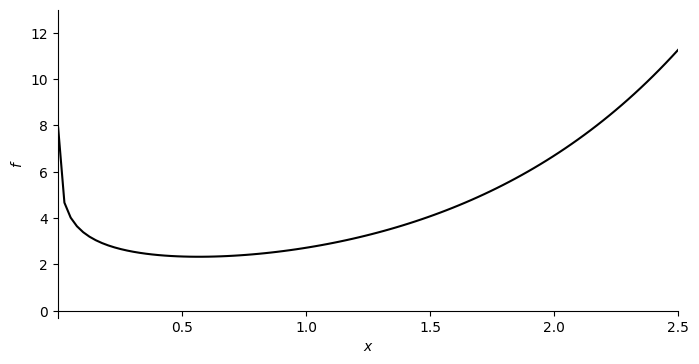

In [51]:
plot_f([0.001, 2.5], [-0.3, 13], f_example_1, 0.0)

Gradient descent can be implemented in the following function:

In [52]:
def gradient_descent(dfdx, x, learning_rate = 0.1, num_iterations = 100):
    for iteration in range(num_iterations):
        x = x - learning_rate * dfdx(x)
    return x

Note that there are three parameters in this implementation: `num_iterations`, `learning_rate`, initial point `x_initial`. Model parameters for such methods as gradient descent are usually found experimentially. For now, just assume that you know the parameters that will work in this model - you will see the discussion of that later. To optimize the function, set up the parameters and call the defined function `gradient_descent`:

In [53]:
num_iterations = 25; learning_rate = 0.1; x_initial = 1.6
print("Gradient descent result: x_min =", gradient_descent(dfdx_example_1, x_initial, learning_rate, num_iterations))

Gradient descent result: x_min = 0.5671434156768685


The code in following cell will help you to visualize and understand the gradient descent method deeper. After the end of the animation, you can click on the plot to choose a new initial point and investigate how the gradient descent method will be performed.

You can see that it works successfully here, bringing it to the global minimum point!

What if some of the parameters will be changed? Will the method always work? Uncomment the lines in the cell below and rerun the code to investigate what happens if other parameter values are chosen. Try to investigate and analyse the results. You can read some comments below.

*Notes related to this animation*:
- Gradient descent is performed with some pauses between the iterations for visualization purposes. The actual implementation is much faster.
- The animation stops when minimum point is reached with certain accuracy (it might be a smaller number of steps than `num_iterations`) - to avoid long runs of the code and for teaching purposes.
- Please wait for the end of the animation before making any code changes or rerunning the cell. In case of any issues, you can try to restart the Kernel and rerun the notebook.

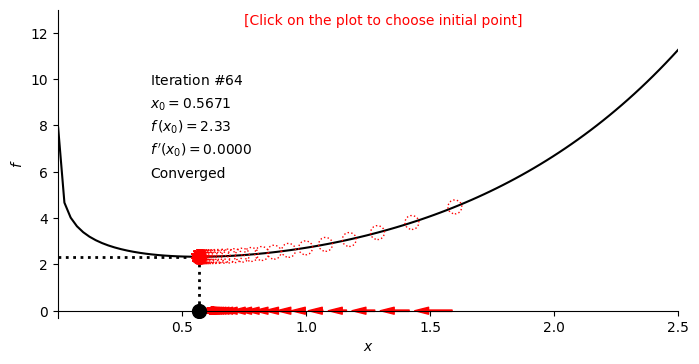

In [61]:
# num_iterations = 25; learning_rate = 0.1; x_initial = 1.6
# num_iterations = 25; learning_rate = 0.3; x_initial = 1.6
# num_iterations = 25; learning_rate = 0.5; x_initial = 1.6
# num_iterations = 25; learning_rate = 0.04; x_initial = 1.6
# num_iterations = 75; learning_rate = 0.04; x_initial = 1.6
# num_iterations = 25; learning_rate = 0.1; x_initial = 0.05
# num_iterations = 25; learning_rate = 0.1; x_initial = 0.03
# num_iterations = 25; learning_rate = 0.1; x_initial = 0.02

gd_example_1 = gradient_descent_one_variable([0.001, 2.5], [-0.3, 13], f_example_1, dfdx_example_1,
                                   gradient_descent, num_iterations, learning_rate, x_initial, 0.0, [0.35, 9.5])

Comments related to the choice of the parameters in the animation above:

- Choosing `num_iterations = 25`, `learning_rate = 0.1`, `x_initial = 1.6` you get to the minimum point successfully. Even a little bit earlier - on the iteration 21, so for this choice of the learning rate and initial point, the number of iterations could have been taken less than `25` to save some computation time.

- Increasing the `learning_rate` to `0.3` you can see that the method converges even faster - you need less number of iterations. But note that the steps are larger and this may cause some problems.

- Increasing the `learning_rate` further to `0.5` the method doesn't converge anymore! You steped too far away from the minimum point. So, be careful - increasing `learning_rate` the method may converge significantly faster... or not converge at all.

- To be "safe", you may think, why not to decrease `learning_rate`?! Take it `0.04`, keeping the rest of the parameters the same. The model will not run enough number of iterations to converge!

- Increasing `num_iterations`, say to `75`, the model will converge but slowly. This would be more "expensive" computationally.

- What if you get back to the original parameters `num_iterations = 25`, `learning_rate = 0.1`, but choose some other `x_initial`, e.g. `0.05`? The function is steeper at that point, thus the gradient is larger in absolute value, and the first step is larger. But it will work - you will get to the minimum point.

- If you take `x_initial = 0.03` the function is even steeper, making the first step significantly larger. You are risking "missing" the minimum point.

- Taking `x_initial = 0.02` the method doesn't converge anymore...

This is a very simple example, but hopefully, it gives you an idea of how important is the choice of the initial parameters.

<a name='6.2'></a>
### 6.2 - Function with Multiple Minima

Now you can take a slightly more complicated example - a function in one variable, but with multiple minima. Such an example was shown in the videos, and you can plot the function with the following code:

In [ ]:
plot_f([0.001, 2], [-6.3, 5], f_example_2, -6)

Function `f_example_2` and its derivative `dfdx_example_2` are pre-defined and uploaded into this notebook. At this stage, while you are mastering the optimization method, do not worry about the corresponding expressions, just concentrate on the gradient descent and the related parameters for now.

Use the following code to run gradient descent with the same `learning_rate` and `num_iterations`, but with a different starting point:

In [ ]:
print("Gradient descent results")
print("Global minimum: x_min =", gradient_descent(dfdx_example_2, x=1.3, learning_rate=0.005, num_iterations=35))
print("Local minimum: x_min =", gradient_descent(dfdx_example_2, x=0.25, learning_rate=0.005, num_iterations=35))

The results are different. Both times the point did fall into one of the minima, but in the first run it was a global minimum, while in the second run it got "stuck" in a local one. To see the visualization of what is happening, run the code below. You can uncomment the lines to try different sets of parameters or click on the plot to choose the initial point (after the end of the animation).

In [ ]:
#num_iterations = 35; learning_rate = 0.005; x_initial = 1.3
num_iterations = 35; learning_rate = 0.005; x_initial = 0.25
# num_iterations = 35; learning_rate = 0.01; x_initial = 1.3

gd_example_2 = gradient_descent_one_variable([0.001, 2], [-6.3, 5], f_example_2, dfdx_example_2,
                                      gradient_descent, num_iterations, learning_rate, x_initial, -6, [0.1, -0.5])

You can see that gradient descent method is robust - it allows you to optimize a function with a small number of calculations, but it has some drawbacks. The efficiency of the method depends a lot on the choice of the initial parameters, and it is a challenge in machine learning applications to choose the "right" set of parameters to train the model!

<a name='7'></a>
## 7 - Optimization Using Gradient Descent in Two Variables

In this lab, you will implement and visualize the gradient descent method optimizing some functions in two variables. You will have a chance to experiment with the initial parameters, and investigate the results and limitations of the method.

<a name='7.1'></a>
### 7.1 - Function with One Global Minimum

Let's explore a simple example of a function in two variables $f\left(x, y\right)$ with one global minimum. Such a function was discussed in the videos, it is predefined and uploaded into this notebook as `f_example_3` with its partial derivatives `dfdx_example_3` and `dfdy_example_3`. At this stage, you do not need to worry about the exact expression for that function and its partial derivatives, so you can focus on the implementation of gradient descent and the choice of the related parameters. Run the following cell to plot the function.

In [ ]:
plot_f_cont_and_surf([0, 5], [0, 5], [74, 85], f_example_3, cmap='coolwarm', view={'azim':-60,'elev':28})

To find the minimum, you can implement gradient descent starting from the initial point $\left(x_0, y_0\right)$ and making steps iteration by iteration using the following equations:


$$x_1 = x_0 - \alpha \frac{\partial f}{\partial x}(x_0, y_0),$$
$$y_1 = y_0 - \alpha \frac{\partial f}{\partial y}(x_0, y_0),\tag{1}$$

where $\alpha>0$ is a learning rate. Number of iterations is also a parameter. The method is implemented with the following code:

In [20]:
def gradient_descent(dfdx, dfdy, x, y, learning_rate = 0.1, num_iterations = 100):
    for iteration in range(num_iterations):
        x, y = x - learning_rate * dfdx(x, y), y - learning_rate * dfdy(x, y)
    return x, y

Now to optimize the function, set up the parameters `num_iterations`, `learning_rate`, `x_initial`, `y_initial` and run gradient descent:

In [ ]:
num_iterations = 30; learning_rate = 0.25; x_initial = 0.5; y_initial = 0.6
print("Gradient descent result: x_min, y_min =",
      gradient_descent(dfdx_example_3, dfdy_example_3, x_initial, y_initial, learning_rate, num_iterations))

You can see the visualization running the following code. Note that gradient descent in two variables performs steps on the plane, in a direction opposite to the gradient vector $\begin{bmatrix}\frac{\partial f}{\partial x}(x_0, y_0) \\ \frac{\partial f}{\partial y}(x_0, y_0)\end{bmatrix}$ with the learning rate $\alpha$ as a scaling factor.

By uncommenting different lines you can experiment with various sets of the parameter values and corresponding results. At the end of the animation, you can also click on the contour plot to choose the initial point and restart the animation automatically.

Run a few experiments and try to explain what is actually happening in each of the cases.

In [ ]:
num_iterations = 20; learning_rate = 0.25; x_initial = 0.5; y_initial = 0.6
# num_iterations = 20; learning_rate = 0.5; x_initial = 0.5; y_initial = 0.6
# num_iterations = 20; learning_rate = 0.15; x_initial = 0.5; y_initial = 0.6
# num_iterations = 20; learning_rate = 0.15; x_initial = 3.5; y_initial = 3.6

gd_example_3 = gradient_descent_two_variables([0, 5], [0, 5], [74, 85],
                                              f_example_3, dfdx_example_3, dfdy_example_3,
                                              gradient_descent, num_iterations, learning_rate,
                                              x_initial, y_initial,
                                              [0.1, 0.1, 81.5], 2, [4, 1, 171],
                                              cmap='coolwarm', view={'azim':-60,'elev':28})

<a name='7.2'></a>
### 7.2 - Function with Multiple Minima

Let's investigate a more complicated case of a function, which was also shown in the videos:

In [ ]:
plot_f_cont_and_surf([0, 5], [0, 5], [6, 9.5], f_example_4, cmap='terrain', view={'azim':-63,'elev':21})

You can find its global minimum point by using gradient descent with the following parameters:

In [ ]:
num_iterations = 100; learning_rate = 0.2; x_initial = 0.5; y_initial = 3

print("Gradient descent result: x_min, y_min =",
      gradient_descent(dfdx_example_4, dfdy_example_4, x_initial, y_initial, learning_rate, num_iterations))

However, the shape of the surface is much more complicated and not every initial point will bring you to the global minimum of this surface. Use the following code to explore various sets of parameters and the results of gradient descent.

In [ ]:
# Converges to the global minimum point.
num_iterations = 30; learning_rate = 0.2; x_initial = 0.5; y_initial = 3
# Converges to a local minimum point.
# num_iterations = 20; learning_rate = 0.2; x_initial = 2; y_initial = 3
# Converges to another local minimum point.
# num_iterations = 20; learning_rate = 0.2; x_initial = 4; y_initial = 0.5

gd_example_4 = gradient_descent_two_variables([0, 5], [0, 5], [6, 9.5],
                                              f_example_4, dfdx_example_4, dfdy_example_4,
                                              gradient_descent, num_iterations, learning_rate,
                                              x_initial, y_initial,
                                              [2, 2, 6], 0.5, [2, 1, 63],
                                              cmap='terrain', view={'azim':-63,'elev':21})

You had a chance to experience the robustness and limitations of the gradient descent methods for a function in two variables.